In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data=pd.read_csv('50_Startups.csv')
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
print("Missing values : \n",data.isnull().sum())

Missing values : 
 RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64


In [10]:
if 'STATE' in data.columns:
    label_encoder=LabelEncoder()
    data['STATE']=label_encoder.fit_transform(data['STATE'])

In [11]:
x=data[['PROFIT']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
linked=linkage(x_scaled,method='ward')

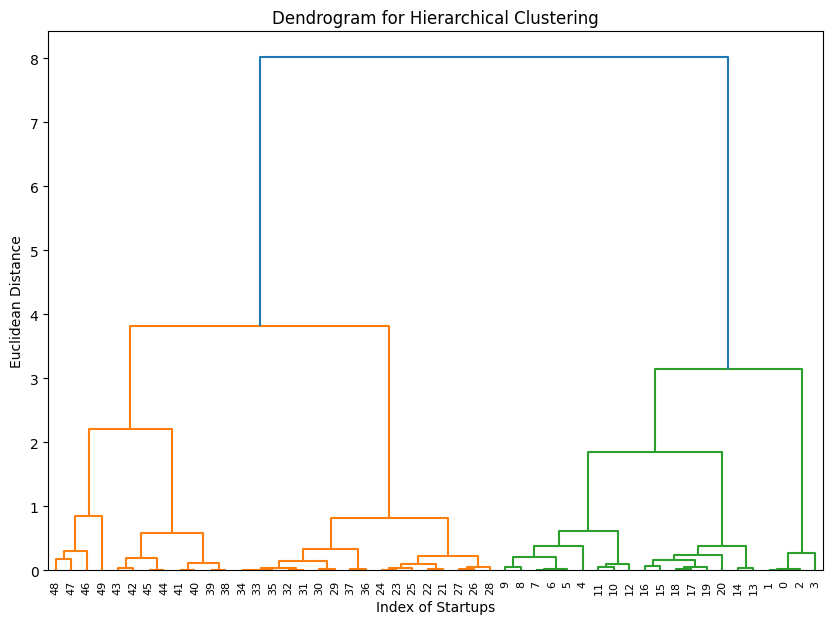

In [12]:
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index of Startups')
plt.ylabel('Euclidean Distance')
plt.show()

In [19]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = cluster_model.fit_predict(x_scaled)

# Step 8: Display Clustered Data
data[['PROFIT', 'Cluster']].head()

,PROFIT,Cluster
0,192261.83,0
1,191792.06,0
2,191050.39,0
3,182901.99,0
4,166187.94,0


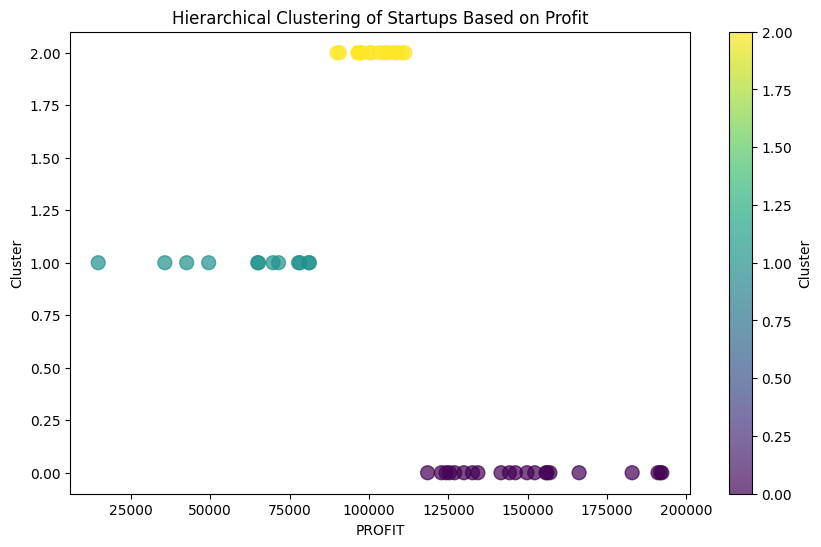

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['PROFIT'], data['Cluster'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering of Startups Based on Profit')
plt.xlabel('PROFIT')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()